# 5 Summary and Conclusions

In [1]:
import warnings
import pandas as pd
from utils import plot_results
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
authors_results = pd.read_csv('results/authors_results.csv')
authors_results = authors_results.drop(columns='political')
baseline_lda_results = pd.read_csv('results/baseline_results_lda.csv', index_col=[0])
baseline_svd_results = pd.read_csv('results/baseline_results_svd.csv', index_col=[0])
different_k_results = pd.read_csv('results/different_k_results.csv', index_col=[0])
merged_data_results = pd.read_csv('results/merged_data_results.csv', index_col=[0])

In [3]:
all_results = pd.DataFrame()
all_results = pd.concat([all_results, authors_results, baseline_lda_results,
                         baseline_svd_results, different_k_results, merged_data_results],
                        ignore_index=True)

In [4]:
all_results

,name,age,ope,con,ext,agr,neu,gender
0,Kosinski_SVD,0.61,0.44,0.26,0.30,0.24,0.29,0.94
1,Kosinski_LDA,0.68,0.42,0.22,0.25,0.18,0.24,0.88
2,baseline_results_lda,0.68,0.37,0.24,0.24,0.16,0.22,0.87
3,baseline_results_svd,0.59,0.43,0.25,0.29,0.23,0.29,0.94
4,svd_300_results,0.64,0.45,0.27,0.33,0.27,0.31,0.96
5,svd_1000_results,0.65,0.43,0.24,0.32,0.25,0.29,0.96
6,svd_1500_results,0.65,0.41,0.22,0.30,0.25,0.28,0.96
7,lda_100_results,0.68,0.38,0.24,0.23,0.17,0.23,0.88
8,lda_150_results,0.71,0.38,0.23,0.24,0.18,0.23,0.88
9,psychographic_data_only,0.14,0.24,0.42,0.49,0.46,0.63,0.67


Legend:<br>
    
    Kosinski_SVD              - results from “Mining Big Data to Extract Patterns and Predict Real-Life Outcomes” article     published in Psychological Methods in 2016.
    Kosinski_LDA              - same as above

    baseline_results_lda      - LDA k = 50
    baseline_results_svd      - SVD k = 50

    svd_300_results           - SVD k = 300
    svd_1000_results          - SVD k = 1000
    svd_1500_results          - SVD k = 1500
    lda_100_results           - LDA k = 100
    lda_150_results           - LDA k = 150
    
    psychographic_data_only   - no User-Like matrix (reduced or otherwise)
    
    merged_svd_50_results     - SVD k = 50    AND psychographic data
    merged_svd_300_results    - SVD k = 300   AND psychographic data
    merged_lda_150_results    - LDA k = 150   AND psychographic data
    
    
I'm using default scikit-learn LinearRegression, LogisticRegression, TruncatedSVD and LatentDirichletAllocation models. Setting random_state and n_jobs where applicable and testing different values of k (number of reduced dimensions of original User-Like matrix).

In [5]:
svd_results = all_results.iloc[[0, 3, 4, 5, 6, 10, 11, 9], :]
lda_results = all_results.iloc[[1, 2, 7, 8, 12, 9], :]

### Gender

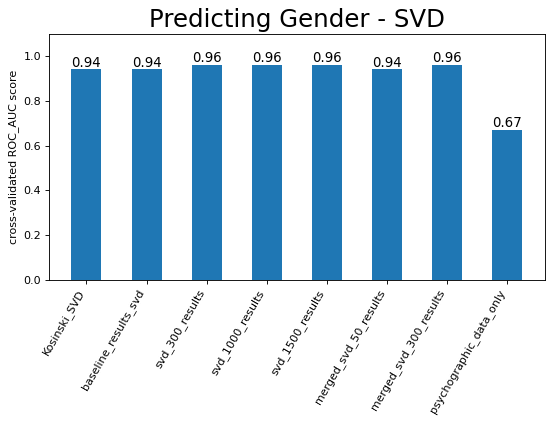

In [6]:
plot_results('Predicting Gender - SVD', svd_results['name'], svd_results['gender'], 
             'cross-validated ROC_AUC score')

Increasing number of dimensions from 50 to 300 in SVD results in 2% better AUC scores for Gender prediction. Further increases of dimensions bring no benefits. Additional features (age, Big Five traits) also bring no benefits.

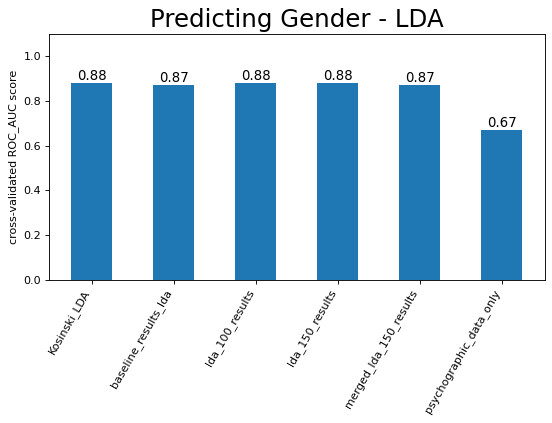

In [7]:
plot_results('Predicting Gender - LDA', lda_results['name'], lda_results['gender'], 
             'cross-validated ROC_AUC score')

Slight improvement with k = 100 over baseline, no benefit of including additional data.

### Age

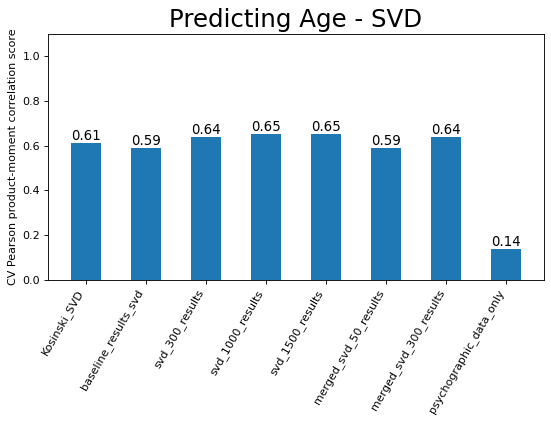

In [8]:
plot_results('Predicting Age - SVD', svd_results['name'], svd_results['age'],
             'CV Pearson product-moment correlation score')

Increasing number of dimensions from 50 to 1000 in SVD results in 6% better Pearson product-moment correlation scores for Age prediction. Further increases of dimensions bring no benefits. Inclusion of additional features (age, Big Five traits) bring no benefits.

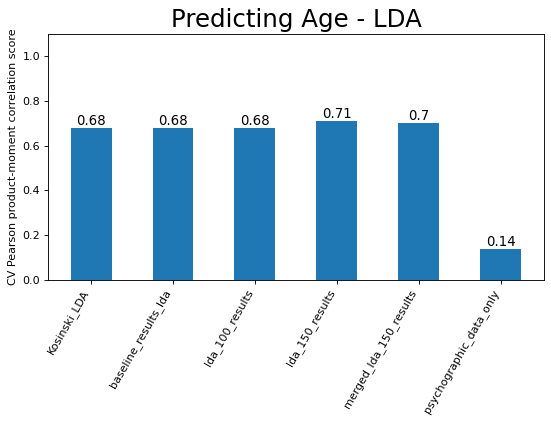

In [9]:
plot_results('Predicting Age - LDA', lda_results['name'], lda_results['age'],
             'CV Pearson product-moment correlation score')

Slight improvement with k = 150 over baseline, no benefit of including additional data.

### Openness

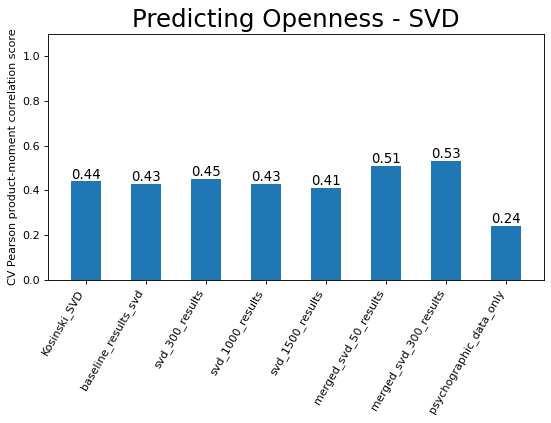

In [10]:
plot_results('Predicting Openness - SVD', svd_results['name'], svd_results['ope'],
             'CV Pearson product-moment correlation score')

Increasing number of dimensions from 50 to 300 in SVD results in 2% better Pearson product-moment correlation scores for Openness prediction. Further increases of dimensions actually revert those gains. Inclusion of additional features (age, Big Five traits) yield additional 8% for both <i>k</i> = 50 and <i>k</i> = 300.

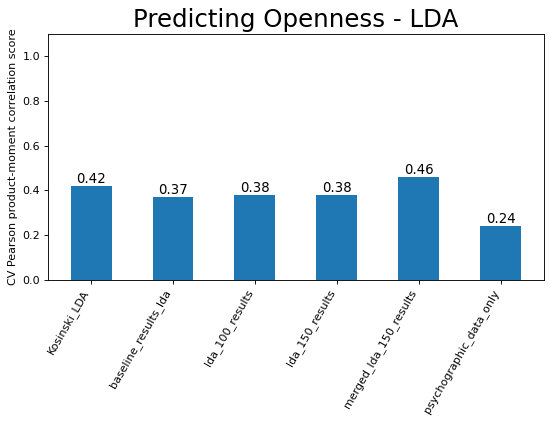

In [11]:
plot_results('Predicting Openness - LDA', lda_results['name'], lda_results['ope'],
             'CV Pearson product-moment correlation score')

Slight improvement with k = 100 over baseline, significant benefit of including additional data.

### Conscientiousness

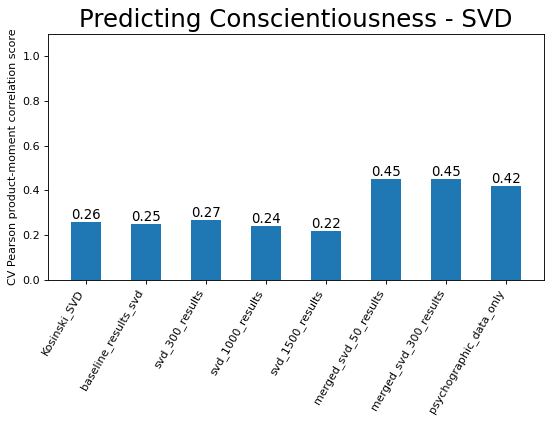

In [12]:
plot_results('Predicting Conscientiousness - SVD', svd_results['name'], svd_results['con'],
             'CV Pearson product-moment correlation score')

Increasing number of dimensions from 50 to 300 in SVD results in 2% better Pearson product-moment correlation scores for Conscientiousness prediction. Further increases of dimensions actually revert those gains. Inclusion of additional features (age, Big Five traits) yield significantly better results.

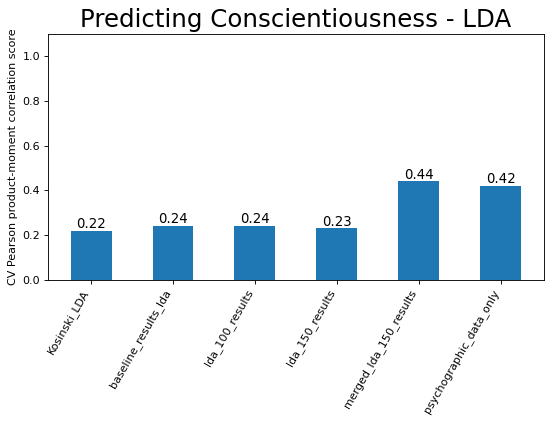

In [13]:
plot_results('Predicting Conscientiousness - LDA', lda_results['name'], lda_results['con'],
             'CV Pearson product-moment correlation score')

No improvement with k = 100, actually slight decrease at k = 150 in comparison with baseline, significant benefit of including additional data.

### Extroversion

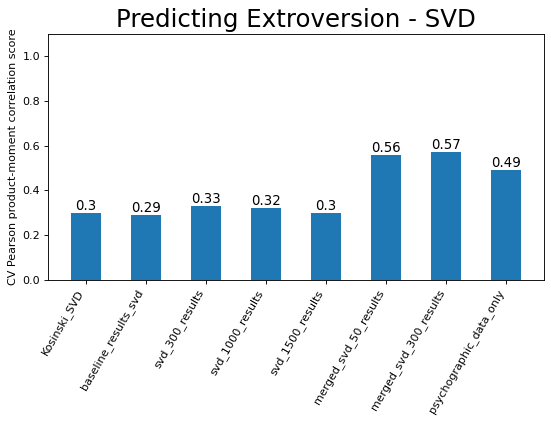

In [14]:
plot_results('Predicting Extroversion - SVD', svd_results['name'], svd_results['ext'],
             'CV Pearson product-moment correlation score')

Increasing number of dimensions from 50 to 300 in SVD results in 4% better Pearson product-moment correlation scores for Extroversion prediction. Further increases of dimensions actually revert those gains. Inclusion of additional features (age, Big Five traits) yield significantly better results.

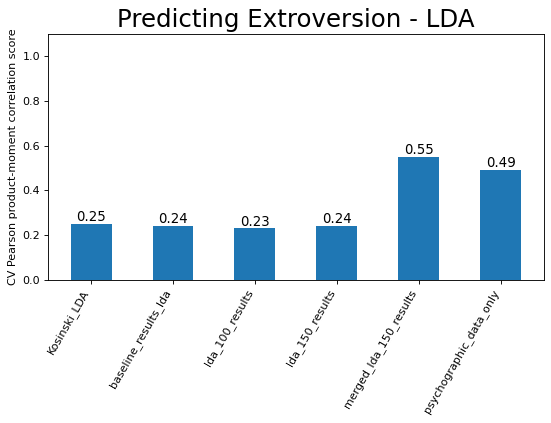

In [15]:
plot_results('Predicting Extroversion - LDA', lda_results['name'], lda_results['ext'],
             'CV Pearson product-moment correlation score')

No improvement with k = 150, slight decrease at k = 100 in comparison with baseline, significant benefit of including additional data.

### Agreeableness

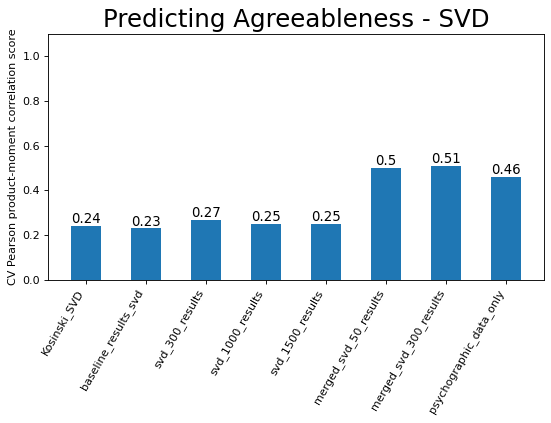

In [16]:
plot_results('Predicting Agreeableness - SVD', svd_results['name'], svd_results['agr'],
             'CV Pearson product-moment correlation score')

Increasing number of dimensions from 50 to 300 in SVD results in 4% better Pearson product-moment correlation scores for Agreeableness prediction. Further increases of dimensions actually revert those gains. Inclusion of additional features (age, Big Five traits) yield significantly better results.

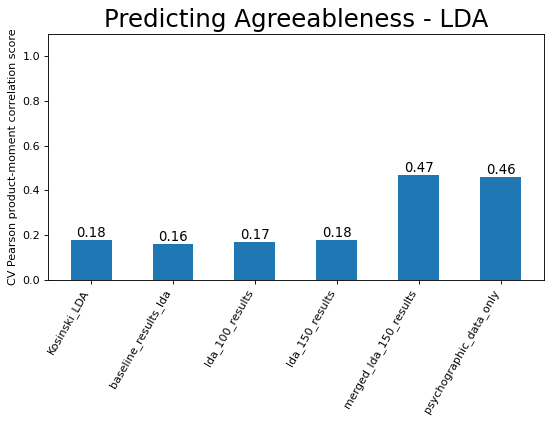

In [17]:
plot_results('Predicting Agreeableness - LDA', lda_results['name'], lda_results['agr'],
             'CV Pearson product-moment correlation score')

Slight improvements at k = 100 and at k = 150 over baseline, significant benefit of including additional data.

### Neuroticism

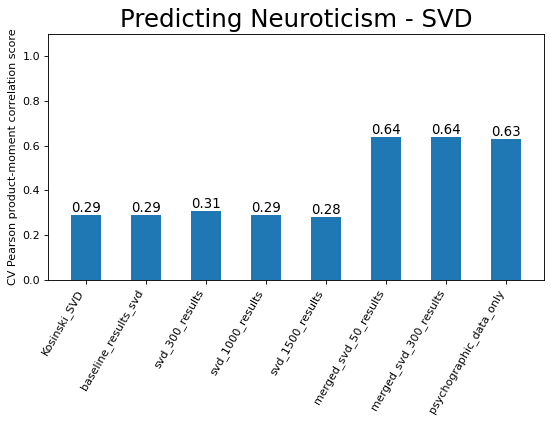

In [18]:
plot_results('Predicting Neuroticism - SVD', svd_results['name'], svd_results['neu'],
             'CV Pearson product-moment correlation score')

Increasing number of dimensions from 50 to 300 in SVD results in 2% better Pearson product-moment correlation scores for Neuroticism prediction. Further increases of dimensions actually revert those gains. Inclusion of additional features (age, Big Five traits) yield significantly better results.

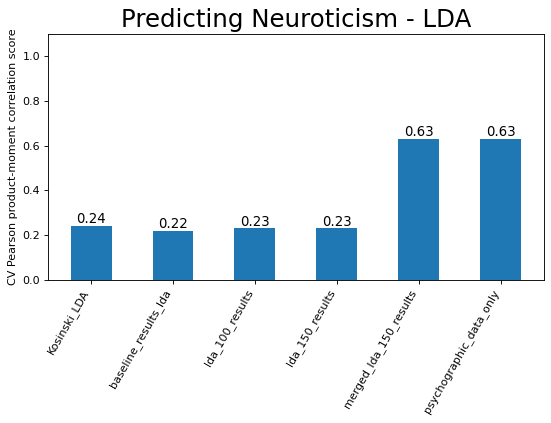

In [19]:
plot_results('Predicting Neuroticism - LDA', lda_results['name'], lda_results['neu'],
             'CV Pearson product-moment correlation score')

Slight improvement at k = 100 and k = 150 over baseline, significant benefit of including additional data.

## Conclusions

Dimensionality reduction is a powerful tool that allows data scientists to tackle Big Data even on home PC.

Adding dimensions results in better predictions but up to a point. Even though 1500 SVD dimensions explain 67% of the variance in User-Like matrix, such data doesn't neccesarily produce better estimations in comparison with SVD k = 300, that explain only 36% of the variance.

Inclusion of psychographic features improved predictions of Big Five scores significantly.

If you have any questions or feedback on this project feel free to contact me:<br>

Bartosz Lubecki<br>
lubecki@windowslive.com